In [4]:
import matplotlib.pyplot as plt
from skimage.io import imread

input_name="D:\\images\\ABRF LMRG Image Analysis Study\\nuclei\\nuclei1_out_c00_dr90_image.tif" 

In [5]:
import tnia.io.tifffile_helper as tfh
input_image, voxel_size_x, voxel_size_y, voxel_size_z = tfh.open_ij3D(input_name)
print(input_image.shape)
print(voxel_size_x, voxel_size_y, voxel_size_z)

(100, 258, 258)
0.1238060147933331 0.1238060147933331 0.2


In [6]:
import pyclesperanto_prototype as cle

# select a specific OpenCL / GPU device and see which one was chosen
cle.select_device('RTX')

<GeForce RTX 3090 on Platform: NVIDIA CUDA (1 refs)>

In [7]:
from tnia.plotting.projections import show_xyz_max_clij

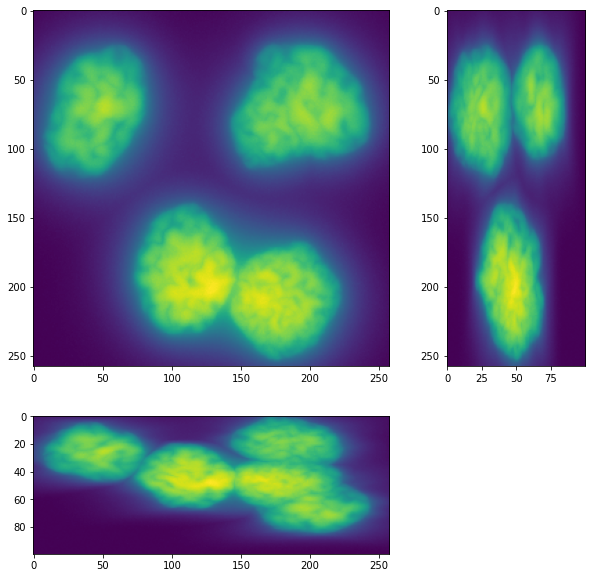

In [8]:
show_xyz_max_clij(input_image)

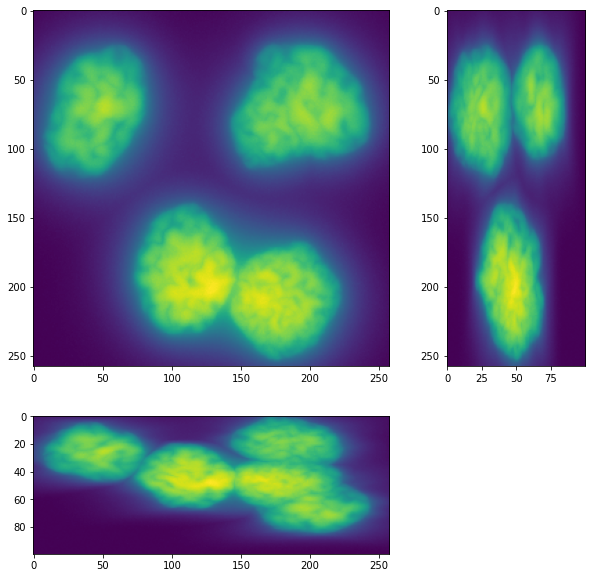

In [61]:
input_gpu = cle.push(input_image)
from matplotlib import gridspec

def show(image_to_show, labels=False):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    fig=plt.figure(figsize=(10,10))

    spec=gridspec.GridSpec(ncols=2, nrows=2, height_ratios=[258,100], width_ratios=[258,100])

    ax0=fig.add_subplot(spec[0])
    ax1=fig.add_subplot(spec[1])
    ax2=fig.add_subplot(spec[2])

    projection_x = cle.maximum_x_projection(image_to_show)
    projection_y = cle.maximum_y_projection(image_to_show)
    projection_z = cle.maximum_z_projection(image_to_show)

    ax0.imshow(projection_z)
    ax1.imshow(projection_x)
    ax2.imshow(projection_y)
    #cle.imshow(projection_z, plot=axs[0], labels=labels)
    #cle.imshow(projection_y, plot=axs[1], labels=labels)
    #cle.imshow(projection_z, plot=axs[2], labels=labels)

show(input_gpu)